## Overall flow of machine learning 

![](lecture/dl1.png)

## Load DataSet

![](lecture/dl3.png)

![](lecture/dl2.png)

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# load dataset
iris = datasets.load_iris()
print(len(iris.data))
print(iris['feature_names'])
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
#X = X[['sepal length (cm)','petal length (cm)']]
Y = pd.DataFrame(iris['target'], columns=['target'])
#combin two DataFrame
#print("target_names: "+str(iris['target_names']))
iris_data = pd.concat([X,Y], axis=1)
Y=iris_data['target'].ravel()
Y
#只挑出 target是0和1的出來,因為要做二元分類
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#iris_data = iris_data[iris_data['target'].isin([1,2])]
#iris_data

150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris_data['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_data[iris_data['target']==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [7]:
iris_data[iris_data['target']==0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [8]:
iris_data[iris_data['target']==1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [9]:
iris_data[iris_data['target']==2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


## Data Preproecssing

In [10]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)
encoded_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [12]:
encoder = LabelEncoder()

encoded_Y = encoder.fit_transform(Y)
#print(encoded_Y)
# convert integers to dummy variables (one hot encoding)
dummy_y = np_utils.to_categorical(encoded_Y)  # one-hot encoding [0. 1. 0.] 
dummy_y[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

##  5 steps in the neural network model in Keras
![Image missing](lecture/5Steps.png)

## Create a NN model using Keras

In [13]:
#Define network
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(3, activation='softmax'))
#compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model summary:")
model.summary()

Model summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 304
Trainable params: 304
Non-trainable params: 0
___________________________________________

In [14]:
model.save('iris_model.h5')

In [15]:
from keras.models import load_model
model=load_model('iris_model.h5')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 304
Trainable params: 304
Non-trainable params: 0
__________________________________________________________

## Training 

In [17]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X,dummy_y, test_size=0.3, random_state=0)
#fit the network
train_history=model.fit(X_train, y_train, epochs=100,batch_size=10,
                        verbose=1,validation_split=0.2,shuffle=True);  #shuffle default is true


Epoch 1/100
9/9 [==============================] - 0s 36ms/step - loss: 1.0973 - accuracy: 0.2143 - val_loss: 1.0816 - val_accuracy: 0.5714
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 1.0785 - accuracy: 0.3690 - val_loss: 1.0651 - val_accuracy: 0.3810
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 1.0428 - accuracy: 0.6548 - val_loss: 1.0539 - val_accuracy: 0.5714
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0219 - accuracy: 0.7262 - val_loss: 1.0393 - val_accuracy: 0.5714
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.9964 - accuracy: 0.7262 - val_loss: 1.0173 - val_accuracy: 0.5714
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.9686 - accuracy: 0.7262 - val_loss: 0.9954 - val_accuracy: 0.5714
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.9379 - accuracy: 0.7262 - val_loss: 0.9766 - val_accuracy: 0.5714
Epoch 8/100
9/9 [=========

In [20]:
train_history

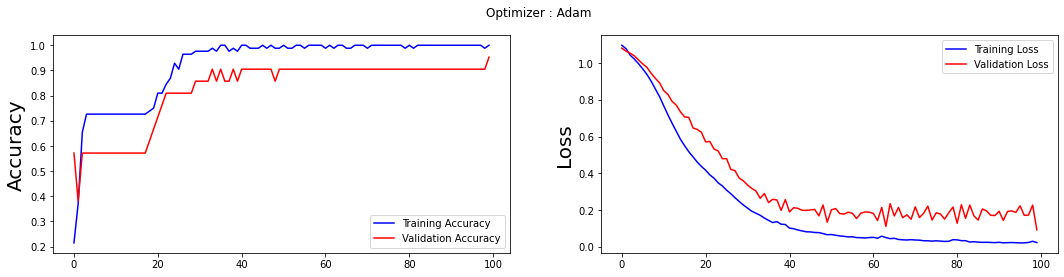

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=12)
plt.ylabel('Accuracy', fontsize=20)
plt.plot(train_history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.ylabel('Loss', fontsize=20)
plt.plot(train_history.history['loss'], color='b', label='Training Loss')
plt.plot(train_history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluation

In [22]:
#evaluate network
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Traing Accuracy = {:.2f}".format(accuracy))

Traing Accuracy = 0.99


In [23]:
#evaluate network
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = {:.2f}".format(accuracy))

Testing Accuracy = 0.98


In [24]:
len(X_test)

45

## Make predictions

### select one of the test data to predict

In [25]:
sample=X_test[:2]
sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0


In [26]:
iris_data[113:115]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
113,5.7,2.5,5.0,2.0,2
114,5.8,2.8,5.1,2.4,2


In [27]:
y_test[:2]

array([[0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [28]:
#test1=X_test[0:1][['sepal length (cm)','petal length (cm)']] #select column
sample=X_test[:2] #select the first row
#print(X_test.shape)  #(1,2)
# or use iloc to retrieve data 
#test1=np.array(X_test.iloc[0]).reshape(1,2)

#make predictions
probabilities = model.predict(sample)
print(probabilities)


[[3.4616108e-09 5.9941650e-04 9.9940062e-01]
 [8.3514731e-03 9.9116170e-01 4.8675796e-04]]


### predict all of the test data

In [29]:
prob = model.predict(X_test)
prob

array([[3.46161078e-09, 5.99416497e-04, 9.99400616e-01],
       [8.35147314e-03, 9.91161704e-01, 4.86757956e-04],
       [9.99096990e-01, 9.03050939e-04, 1.43367726e-13],
       [6.91061208e-09, 1.37875637e-03, 9.98621225e-01],
       [9.97548163e-01, 2.45188386e-03, 8.50585054e-12],
       [3.28659849e-10, 2.12882485e-04, 9.99787152e-01],
       [9.97937977e-01, 2.06204178e-03, 4.18927089e-12],
       [5.52461774e-04, 9.97846961e-01, 1.60065142e-03],
       [4.57653077e-04, 9.96749997e-01, 2.79237120e-03],
       [6.28284831e-03, 9.93466914e-01, 2.50239827e-04],
       [5.30630366e-08, 2.84356670e-03, 9.97156382e-01],
       [7.66103738e-04, 9.97964978e-01, 1.26892852e-03],
       [2.95205420e-04, 9.87561941e-01, 1.21428054e-02],
       [3.39474907e-04, 9.94723976e-01, 4.93645575e-03],
       [1.72138723e-04, 9.63261843e-01, 3.65660638e-02],
       [9.97965932e-01, 2.03408324e-03, 3.96178316e-12],
       [2.04485754e-04, 9.75826681e-01, 2.39688121e-02],
       [2.60704459e-04, 9.28235

In [30]:
predictions=np.argmax(prob,axis=1)
print(predictions)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [31]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [32]:
print(predictions)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [33]:
ground_truth=np.argmax(y_test,axis=1)
ground_truth

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [34]:
errors = np.where(predictions != ground_truth)[0]
errors

array([37], dtype=int64)

In [35]:
nVal=X_test.shape[0]
prob = model.predict(X_test)
#print(prob)
predictions=np.argmax(prob,axis=1)
print(predictions)
ground_truth=np.argmax(y_test[:],axis=1)
print(ground_truth)
errors = np.where(predictions != ground_truth)[0]
print(errors)
print("Number of errors = {}/{}".format(len(errors),nVal))


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[37]
Number of errors = 1/45


In [36]:
for i in range(len(errors)):
    pred_label = np.argmax(prob[errors[i]]) 
    print('error:{},Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        errors[i],
        ground_truth[errors[i]],
        pred_label,
        prob[errors[i]][pred_label]))

error:37,Original label:1, Prediction :2, confidence : 0.968


In [37]:
errors

array([37], dtype=int64)

In [38]:
X_test.iloc[errors]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
83,6.0,2.7,5.1,1.6


In [39]:
data_index=X_test.iloc[errors].index
data_index

Int64Index([83], dtype='int64')

In [40]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
iris_data.iloc[data_index]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
83,6.0,2.7,5.1,1.6,1


## 畫出scatter_matrix
    了解兩兩特徵間對於iris品種分類的狀況

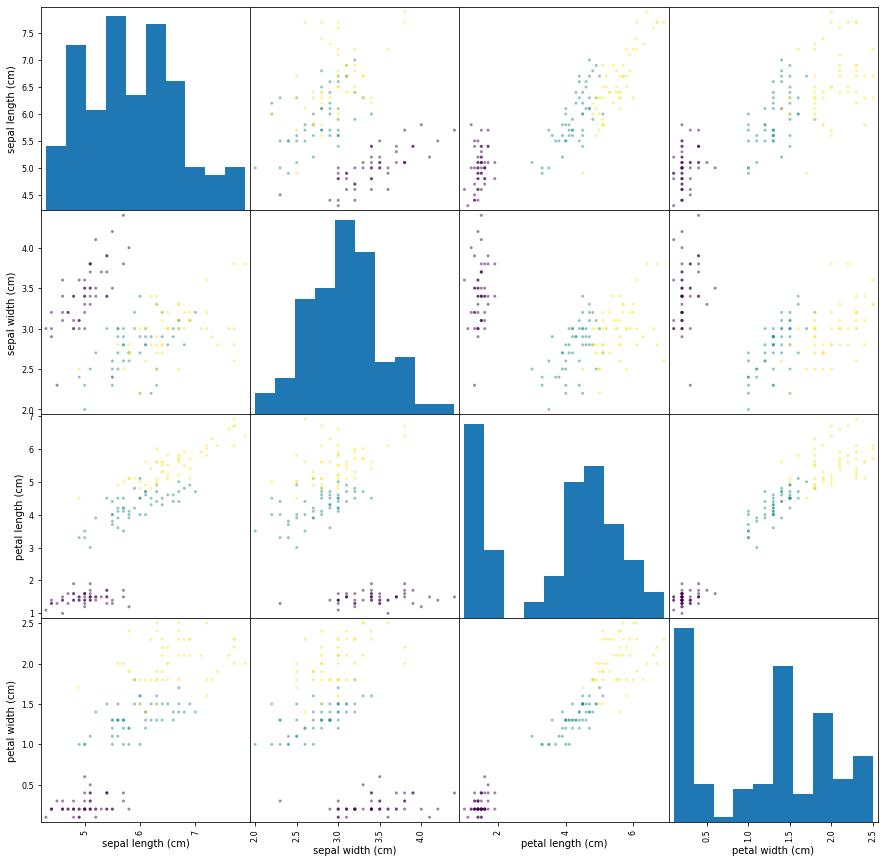

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(X,c=Y, figsize=(15,15))
plt.show()

## 畫出confusion matrix

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Confusion matrix, without normalization
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.94444444 0.05555556]
 [0.         0.         1.        ]]


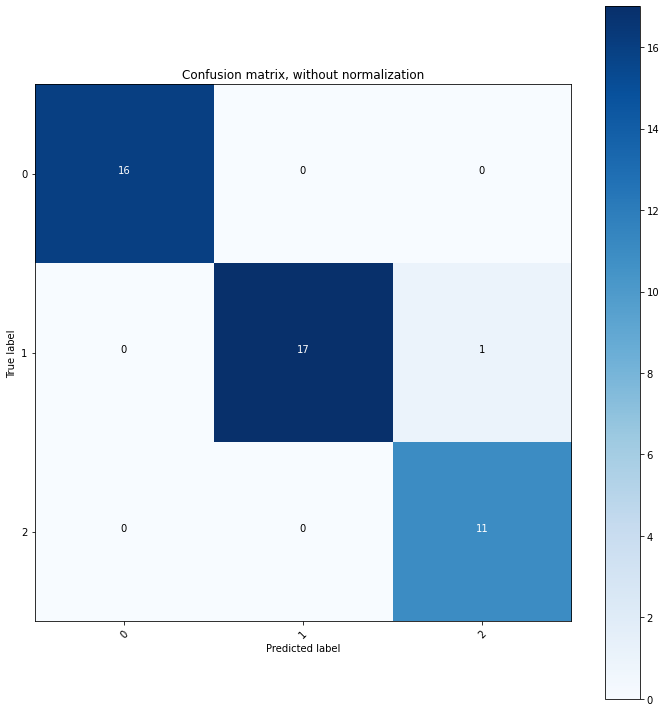

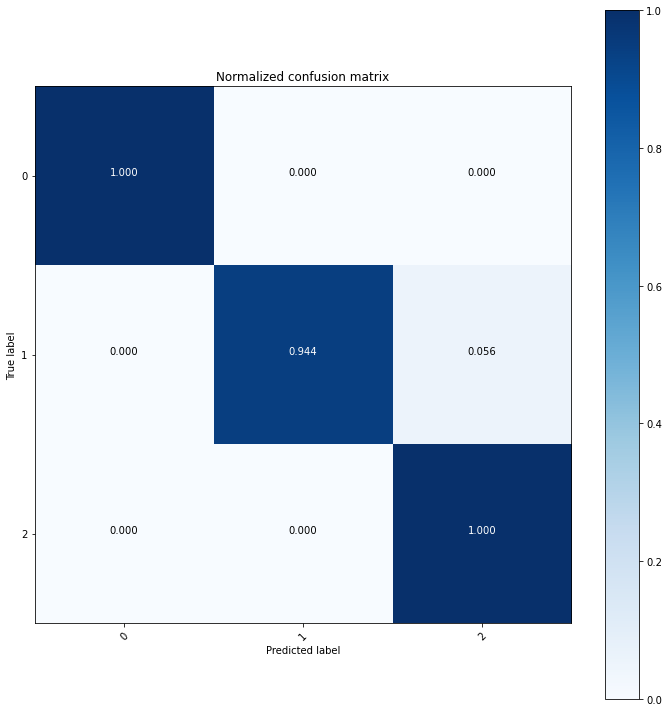

In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

import os,sys
sys.path.append(os.path.abspath('../common')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

C=confusion_matrix(ground_truth, predictions)
print(C)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(C, classes=range(3),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(C, classes=range(3), normalize=True,
                      title='Normalized confusion matrix')

plt.show()